# Multiple Linear Regression
Multiple linear regression is an extension of simple linear regression which takes more than one independent variable to predict the outcome by fitting a best linear relationship.

## Steps
1. Set the values for independent (X) and dependent (Y) variables
2. Split data into train & test set
3. Implementing the linear model



In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
data = pd.read_csv('advertising.csv')
data.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [17]:
x = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales'] # how many sales are made

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

'''
train_test_split = splitting data arrays into two subsets (training & testing data)
test_size = size of the test set
random_state = seed for the random number generator (controls the shuffling applied to the data BEFORE applying the split)
'''

'\ntrain_test_split = splitting data arrays into two subsets (training & testing data)\ntest_size = size of the test set\nrandom_state = seed for the random number generator (controls the shuffling applied to the data BEFORE applying the split)\n'

In [18]:
mlr = LinearRegression()
mlr.fit(x_train, y_train)

print("intercept: ", mlr.intercept_) # Beta0 / y-intercept 
print("coefficients: ", mlr.coef_) # Beta1, Beta2, Beta3 / slope

list(zip(['TV', 'Radio', 'Newspaper'], mlr.coef_))


intercept:  4.334595861728431
coefficients:  [0.05382911 0.11001224 0.00628995]


[('TV', 0.053829108667250075),
 ('Radio', 0.11001224388558056),
 ('Newspaper', 0.006289950146130346)]

## MLR equation / MLR model

Y = B0 + B1X1 + B2X2 + B3X3

X1 = TV

X2 = Radio

X3 = Newspaper

### Sales = 4.3345 + 0.0538TV + 0.11Radio + 0.006Newspaper + e

e = error

test set prediction: [ 9.35221067 20.96344625 16.48851064 20.10971005 21.67148354 16.16054424
 13.5618056  15.39338129 20.81980757 21.00537077 12.29451311 20.70848608
  8.17367308 16.82471534 10.48954832  9.99530649 16.34698901 14.5758119
 17.23065133 12.56890735 18.55715915 12.12402775 20.43312609 17.78017811
 16.73623408 21.60387629 20.13532087 10.82559967 19.12782848 14.84537816
 13.13597397  9.07757918 12.07834143 16.62824427  8.41792841 14.0456697
  9.92050209 14.26101605 16.76262961 17.17185467 18.88797595 15.50165469
 15.78688377 16.86266686 13.03405813 10.47673934 10.6141644  20.85264977
 10.1517568   6.88471443 17.88702583 18.16013938 12.55907083 16.28189561
 18.98024679 11.33714913  5.91026916 10.06159509 17.62383031 13.19628335]


Text(0, 0.5, 'Sales')

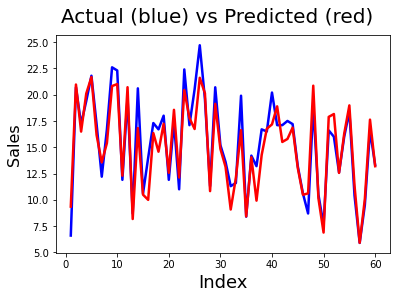

In [22]:
# check how accurate the model is
y_pred_mlr = mlr.predict(x_test)
print("test set prediction: {}".format(y_pred_mlr))

# actual vs predicted
c = [i for i in range(1, 61, 1)]
fig = plt.figure()
plt.plot(c, y_test, color = "blue", linewidth = 2.5, linestyle = "-")
plt.plot(c, y_pred_mlr, color = "red", linewidth = 2.5, linestyle = "-")
fig.suptitle("Actual (blue) vs Predicted (red)", fontsize = 20)
plt.xlabel("Index", fontsize = 18)
plt.ylabel("Sales", fontsize = 16)


In [26]:
# Model evaluation

from sklearn import metrics

# mean absolute error (MAE), mean squared error (MSE), root mean squared error (RMSE)
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred_mlr))
print("MSE: ", metrics.mean_squared_error(y_test, y_pred_mlr))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr)))

# R-squared
print("R-squared: {:.2f}".format(mlr.score(x,y)*100))
# R squared (coefficient of determination) tells us how many points fall ON the regression line
# 90.11 means that the 90.11% of the data FIT the regression line model.



MAE:  1.227818356658941
MSE:  2.6360765623280646
RMSE:  1.6235998775338907
R-squared: 90.11
